In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import binom, ttest_ind
import seaborn as sns

In [2]:
try:
    recipes = pd.read_csv('recipes.csv')
    print('Shape of the dataset: {}'.format(recipes.shape))
except Exception as e:
    print(e)

Shape of the dataset: (57691, 385)


In [3]:
recipes.head()

,Unnamed: 0,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,

In [4]:
recipes.drop(['Unnamed: 0'], axis=1, inplace=True)
recipes.rename(columns={'country':'cuisine'}, inplace=True)

In [5]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 384 entries, cuisine to zucchini
dtypes: object(384)
memory usage: 169.0+ MB


In [6]:
# check for Null values
if recipes.isnull().sum().max() == 0:
    print('No null values')
else:
    recipes.isnull().sum().sort_values(ascending=False)[0:10]

No null values


In [7]:
print('The total number of recipes is: {:,}\n'.format(recipes.shape[0]))
print('The total number of cuisines is: {}\n'.format(recipes.cuisine.value_counts().shape[0]))
recipes.cuisine.value_counts()[:10]

The total number of recipes is: 57,691

The total number of cuisines is: 69



American      40150
Mexico         1754
Italian        1715
Italy          1461
Asian          1176
French          996
east_asian      951
Canada          774
korean          767
Mexican         622
Name: cuisine, dtype: int64

In [8]:
# apply lower case for consistency
recipes['cuisine'] = recipes.cuisine.str.lower()
# standardize cuisine names
recipes.cuisine.replace(['austria' #to replace
                        , 'china'
                        ,'east-african'
                        , 'eastern-europe'
                        , 'france'
                        , 'germany'
                        , 'india'
                        , 'indonesia'
                        , 'iran'
                        , 'italy'
                        , 'japan'
                        , 'israel'
                        , 'korea'
                        , 'mexico'
                        , 'scandinavia'
                        , 'north-african'
                        , 'south-african'
                        , 'south-america'
                        , 'spain'
                        , 'portugal'
                        , 'thailand'
                        , 'uk-and-ireland'
                        , 'irish'
                        , 'english_scottish'
                        , 'vietnam'
                        , 'west-african'
                        , 'canada'
                        , 'eastern_europe'
                        , 'easterneuropean_russian'
                        , 'southwestern'
                        , 'netherlands'
                        , 'lebanon'
                        , 'switzerland'
                        , 'turkey'
                        , 'belgium'],
                        ['austrian' #replace with
                        , 'chinese'
                        , 'east_african'
                        , 'eastern_europe'
                        , 'french'
                        , 'german'
                        , 'indian'
                        , 'indonesian'
                        , 'iranian'
                        , 'italian'
                        , 'japanese'
                        , 'jewish'
                        , 'korean'
                        , 'mexican'
                        , 'scandinavian'
                        , 'north_african'
                        , 'south_african'
                        , 'south_american'
                        , 'spanish'
                        , 'portuguese'
                        , 'thai'
                        , 'uk_irish'
                        , 'uk_irish'
                        , 'uk_scottish'
                        , 'vietnamese'
                        , 'west_african'
                        , 'canadian'
                        , 'east_european'
                        , 'east_european_russian'
                        , 'south_western'
                        , 'dutch'
                        , 'lebanese'
                        , 'swiss'
                        , 'turkish'
                        , 'belgian']
                        , inplace=True)

print('The total number of cuisines is: {}'.format(recipes.cuisine.value_counts().shape[0]))

The total number of cuisines is: 51


In [10]:
# remove cousines with less than 100 recipes
recipes_index = pd.DataFrame([{i} for (i, x) in zip(recipes.cuisine.value_counts().index
                                       , recipes.cuisine.value_counts()) 
                                       if x > 99]
                             , columns=['cuisine']).set_index('cuisine')

recipes.set_index('cuisine', inplace=True)

recipes = recipes.loc[recipes_index.index, :]
recipes.reset_index(inplace=True)
recipes.shape

(57123, 384)

In [32]:
# reduce american bias, take a random sample of 4000 recipes
american = recipes[recipes.cuisine == 'american']
recipes = recipes[recipes.cuisine != 'american']
recipes = pd.concat([recipes, american.sample(4000)], axis=0)
del(american)
print('The total number of recipes is: {:,}\n'.format(recipes.shape[0]))
recipes.cuisine.value_counts()[0:20]

The total number of recipes is: 20,973



american              4000
italian               3250
mexican               2390
french                1264
asian                 1193
east_asian             951
korean                 799
canadian               774
indian                 598
western                450
chinese                442
uk_irish               368
southern_soulfood      346
jewish                 329
japanese               320
spanish_portuguese     291
mediterranean          289
thai                   289
german                 289
scandinavian           250
Name: cuisine, dtype: int64

In [12]:
#encode ingredients
recipes.replace(['No','Yes'],[0,1], inplace=True)
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
40150,italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [34]:
# list top 5 ingredients by cuisine (sorted by the most recurring cuisine)
l_top_5_ingredients = []

cuisines = recipes.groupby('cuisine').mean()
cuisines['num'] = recipes.groupby('cuisine')['cuisine'].count().astype('int')
dim = cuisines.shape[1]
    
for cuisine in cuisines.index:
    top_5_arr_index = np.array(cuisines.loc[cuisine,:][0:dim-1].nlargest(5).index)
    top_5_arr_values = np.array(cuisines.loc[cuisine,:][0:dim-1].nlargest(5).round(2).values)
    d_top_5_ingredients = {'cuisine':cuisine
                           , 'num': cuisines.loc[cuisine,'num']
                           , '1st': top_5_arr_index[0] + ' (' + str(top_5_arr_values[0]) + ')'
                           , '2nd': top_5_arr_index[1] + ' (' + str(top_5_arr_values[1]) + ')'
                           , '3rd': top_5_arr_index[2] + ' (' + str(top_5_arr_values[2]) + ')'
                           , '4th': top_5_arr_index[3] + ' (' + str(top_5_arr_values[3]) + ')'
                           , '5th': top_5_arr_index[4] + ' (' + str(top_5_arr_values[4]) + ')'}
    l_top_5_ingredients.append(d_top_5_ingredients)

cuisines_sorted = pd.DataFrame(l_top_5_ingredients).set_index('cuisine').sort_values('num', ascending=False)
cuisines_sorted[0:5]

,num,1st,2nd,3rd,4th,5th
cuisine,,,,,,
american,4000,egg (0.41),wheat (0.4),butter (0.4),onion (0.29),milk (0.27)
italian,3250,olive_oil (0.61),garlic (0.53),tomato (0.39),onion (0.33),basil (0.31)
mexican,2390,cayenne (0.74),onion (0.68),garlic (0.62),tomato (0.59),corn (0.32)
french,1264,butter (0.5),egg (0.44),wheat (0.37),olive_oil (0.28),cream (0.27)
asian,1193,soy_sauce (0.5),ginger (0.49),garlic (0.48),rice (0.41),scallion (0.38)


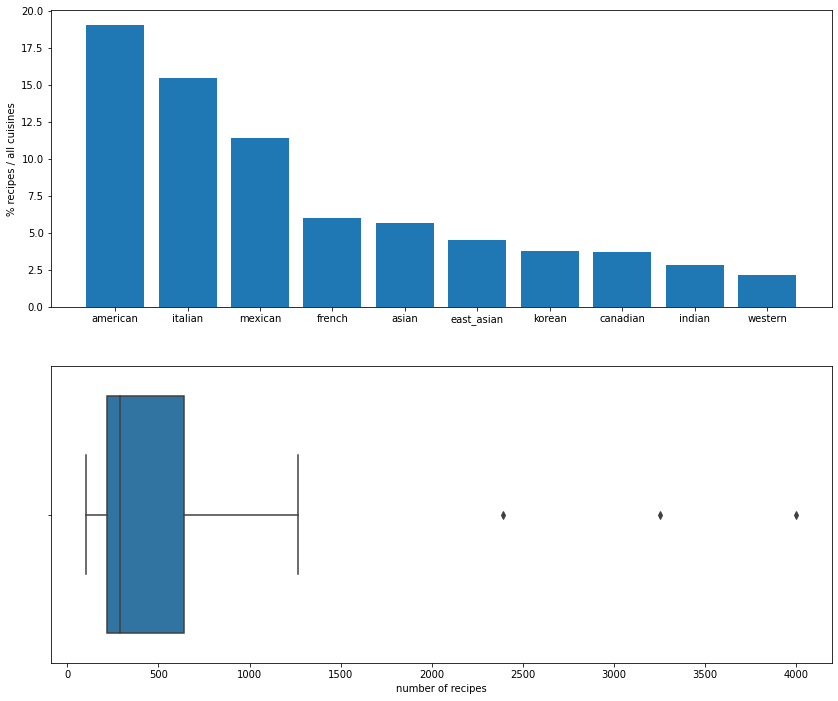

In [24]:
f, axs = plt.subplots(2,1,figsize=(14,12))
axs[0].bar(cuisines_sorted[0:10].reset_index().index, cuisines_sorted.num[0:10]/cuisines_sorted.num.sum()*100, tick_label=cuisines_sorted[0:10].index)
axs[0].set_ylabel('% recipes / all cuisines')
axs[1] = sns.boxplot(x='num', data=cuisines_sorted)
axs[1].set_xlabel('number of recipes')
plt.show()

In [15]:
cuisines_sorted.num.describe()

count      32.00
mean      655.41
std       910.65
min       103.00
25%       219.75
50%       290.00
75%       642.00
max     4,000.00
Name: num, dtype: float64

In [33]:
# list top 5 cuisines by ingredient (sorted by the most recurring ingredient)
l_top_5_cuisines = []

ingredients = recipes.groupby('cuisine').mean().T

for ingredient in ingredients.index:
    top_5_arr_index = np.array(ingredients.loc[ingredient,:].nlargest(5).index)
    top_5_arr_values = np.array(ingredients.loc[ingredient,:].nlargest(5).round(2).values)
    d_top_5_cuisines = {'ingredient':ingredient
                           , 'num': ingredients.loc[ingredient,:].sum()
                           , '1st': top_5_arr_index[0] + ' (' + str(top_5_arr_values[0]) + ')'
                           , '2nd': top_5_arr_index[1] + ' (' + str(top_5_arr_values[1]) + ')'
                           , '3rd': top_5_arr_index[2] + ' (' + str(top_5_arr_values[2]) + ')'
                           , '4th': top_5_arr_index[3] + ' (' + str(top_5_arr_values[3]) + ')'
                           , '5th': top_5_arr_index[4] + ' (' + str(top_5_arr_values[4]) + ')'}
    l_top_5_cuisines.append(d_top_5_cuisines)

ingredients_sorted = pd.DataFrame(l_top_5_cuisines).set_index('ingredient').sort_values('num', ascending=False)
ingredients_sorted[0:5]

,num,1st,2nd,3rd,4th,5th
ingredient,,,,,,
garlic,12.27,mexican (0.62),south_western (0.62),thai (0.6),korean (0.59),spanish_portuguese (0.57)
onion,11.69,cajun_creole (0.7),mexican (0.68),south_western (0.61),central_southamerican (0.54),african (0.53)
wheat,10.23,german (0.65),uk_scottish (0.62),uk_irish (0.58),scandinavian (0.58),eastern_europe (0.53)
egg,9.85,german (0.61),jewish (0.59),uk_scottish (0.53),scandinavian (0.53),eastern_europe (0.52)
butter,9.13,uk_scottish (0.67),scandinavian (0.64),east_european_russian (0.6),uk_irish (0.6),southern_soulfood (0.58)


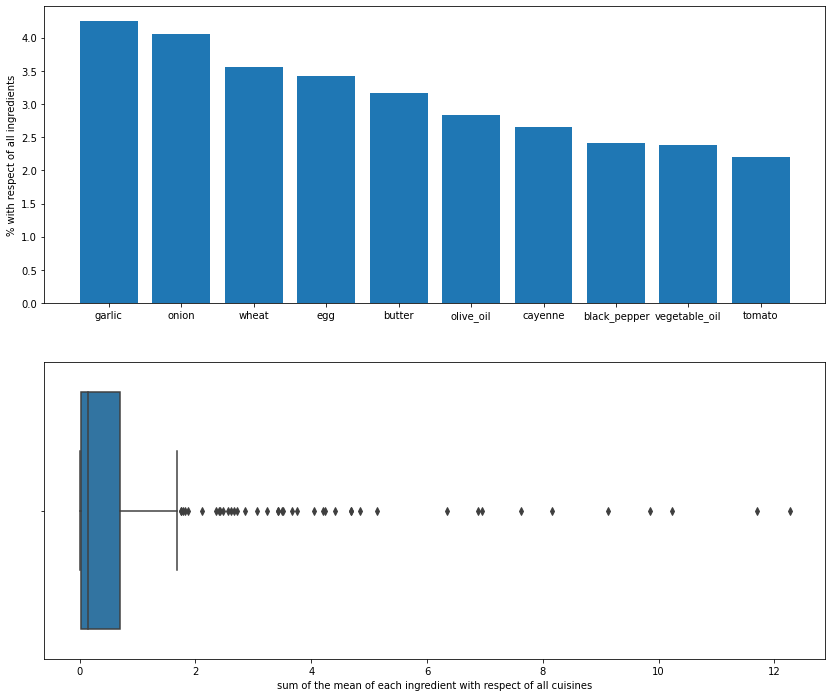

In [28]:
f, axs = plt.subplots(2,1,figsize=(14,12))
axs[0].bar(ingredients_sorted[0:10].reset_index().index, ingredients_sorted.num[0:10]/ingredients_sorted.num.sum()*100, tick_label=ingredients_sorted[0:10].index)
axs[0].set_ylabel('% with respect of all ingredients')
axs[1] = sns.boxplot(x='num', data=ingredients_sorted)
axs[1].set_xlabel('sum of the mean of each ingredient with respect of all cuisines')
plt.show()

In [18]:
ingredients_sorted.num.describe()

count   383.00
mean      0.75
std       1.65
min       0.00
25%       0.03
50%       0.15
75%       0.69
max      12.27
Name: num, dtype: float64

In [19]:
'Japanese recipes: {:.2f} %'.format(cuisines_sorted.loc['japanese','num']/cuisines_sorted.num.sum()*100)
control = cuisines_sorted.loc['japanese','num']/cuisines_sorted.num.sum()

In [35]:
#I am a ninja chef if I detect 28 japanese recipes out of a sample of 1000, assume P-value < 0.05
prob = 1 - binom.cdf(28, 1000, control)
print(str(round(prob, 4)), 'I am a ninja chef!')

0.001 I am a ninja chef!


In [21]:
print(binom.ppf(0.95,1000,control)+1)

23.0
